In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/patient_segmentation_dataset.csv')

print("shape:", df.shape)
display(df.head())
display(df.info())

shape: (2000, 16)


,PatientID,Age,Gender,State,City,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,Male,GA,Unknown,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0
1,P10001,59,Male,OH,Unknown,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0
2,P10002,58,Female,PA,Unknown,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0
3,P10003,43,Female,GA,Unknown,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1
4,P10004,53,Female,NC,Unknown,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2000 non-null   object 
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   State                   2000 non-null   object 
 4   City                    2000 non-null   object 
 5   Height_cm               2000 non-null   int64  
 6   Weight_kg               2000 non-null   int64  
 7   BMI                     2000 non-null   float64
 8   Insurance_Type          2000 non-null   object 
 9   Primary_Condition       1505 non-null   object 
 10  Num_Chronic_Conditions  2000 non-null   int64  
 11  Annual_Visits           2000 non-null   int64  
 12  Avg_Billing_Amount      2000 non-null   float64
 13  Last_Visit_Date         2000 non-null   object 
 14  Days_Since_Last_Visit   2000 non-null   

None

In [2]:
df.isna().sum().sort_values(ascending=False)

Primary_Condition         495
PatientID                   0
Gender                      0
Age                         0
City                        0
Height_cm                   0
Weight_kg                   0
State                       0
BMI                         0
Insurance_Type              0
Num_Chronic_Conditions      0
Annual_Visits               0
Avg_Billing_Amount          0
Last_Visit_Date             0
Days_Since_Last_Visit       0
Preventive_Care_Flag        0
dtype: int64

In [3]:
target_counts = df["Preventive_Care_Flag"].value_counts()
target_ratio = df["Preventive_Care_Flag"].value_counts(normalize=True)

print("Target counts:\n", target_counts)
print("\nTarget ratio:\n", target_ratio)

Target counts:
 Preventive_Care_Flag
0    1072
1     928
Name: count, dtype: int64

Target ratio:
 Preventive_Care_Flag
0    0.536
1    0.464
Name: proportion, dtype: float64


In [4]:
display(df.describe())

,Age,Height_cm,Weight_kg,BMI,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Days_Since_Last_Visit,Preventive_Care_Flag
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,50.69550,167.907500,85.143500,30.740650,1.080000,5.466500,4000.270500,180.085000,0.464000
std,15.44445,12.684494,20.385428,8.839952,0.890504,3.485965,2463.239215,104.688484,0.498827
min,18.00000,145.000000,50.000000,13.400000,0.000000,1.000000,207.000000,1.000000,0.000000
25%,40.00000,158.000000,67.000000,23.800000,1.000000,3.000000,2061.000000,90.000000,0.000000
50%,51.00000,168.000000,86.000000,30.100000,1.000000,4.000000,3707.250000,183.000000,0.000000
75%,63.25000,177.000000,103.000000,37.025000,1.000000,8.000000,5650.875000,268.000000,1.000000
max,87.00000,195.000000,120.000000,57.100000,3.000000,12.000000,12467.500000,365.000000,1.000000


In [5]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numeric_cols].corr()

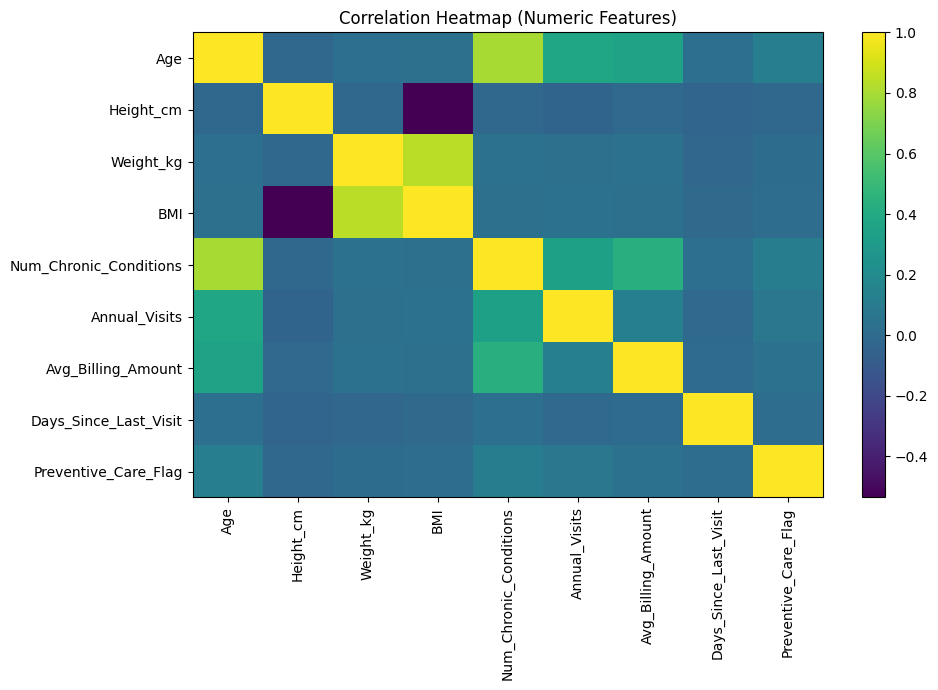

In [6]:
plt.figure(figsize=(10, 7))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

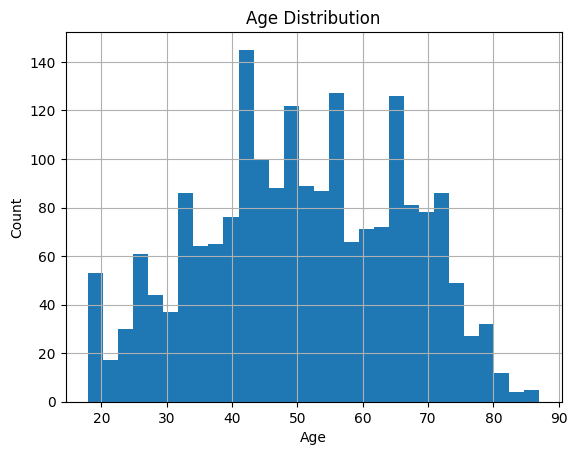

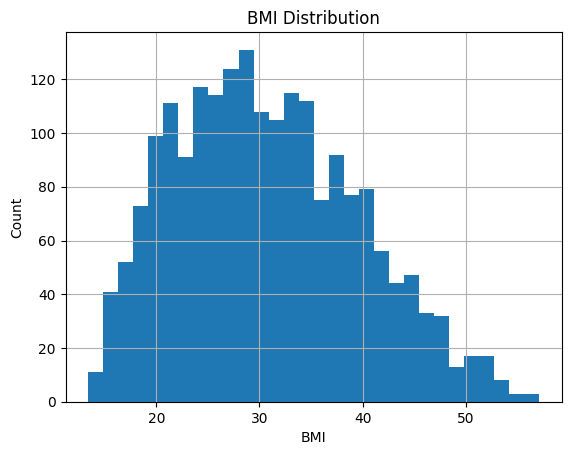

In [7]:
plt.figure()
df["Age"].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure()
df["BMI"].hist(bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

<Figure size 640x480 with 0 Axes>

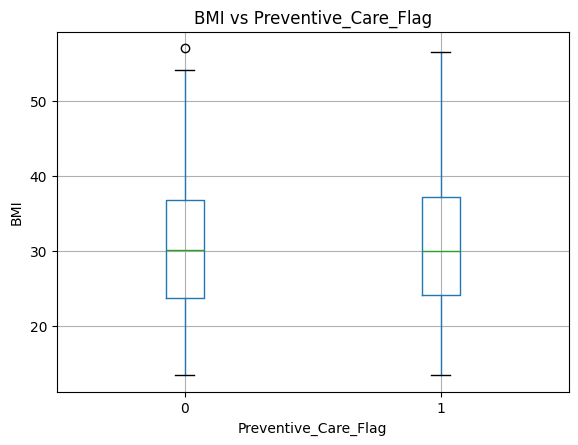

In [8]:
plt.figure()
df.boxplot(column="BMI", by="Preventive_Care_Flag")
plt.title("BMI vs Preventive_Care_Flag")
plt.suptitle("")
plt.xlabel("Preventive_Care_Flag")
plt.ylabel("BMI")
plt.show()

<Figure size 640x480 with 0 Axes>

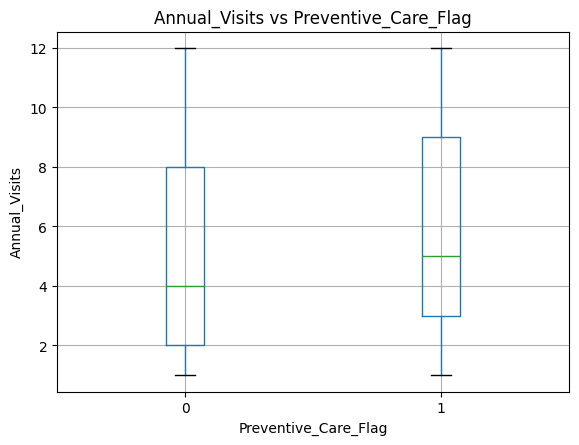

In [9]:
plt.figure()
df.boxplot(column="Annual_Visits", by="Preventive_Care_Flag")
plt.title("Annual_Visits vs Preventive_Care_Flag")
plt.suptitle("")
plt.xlabel("Preventive_Care_Flag")
plt.ylabel("Annual_Visits")
plt.show()